In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings('ignore')

train_clinical_data = pd.read_csv('/home/yusuke/work/kaggle/AMP/train_clinical_data.csv')
supplemental_clinical_data = pd.read_csv('/home/yusuke/work/kaggle/AMP/supplemental_clinical_data.csv')
train_peptides = pd.read_csv('/home/yusuke/work/kaggle/AMP/train_peptides.csv')
train_proteins = pd.read_csv('/home/yusuke/work/kaggle/AMP/train_proteins.csv')

In [3]:
train_proteins

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
232736,58648_108,108,58648,Q9UBX5,27387.8
232737,58648_108,108,58648,Q9UHG2,369437.0
232738,58648_108,108,58648,Q9UKV8,105830.0
232739,58648_108,108,58648,Q9Y646,21257.6


In [4]:
train_peptides.head(50)

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
5,55_0,0,55,O00533,TLKIENVSYQDKGNYR,23216.50
6,55_0,0,55,O00533,VIAVNEVGR,170878.00
7,55_0,0,55,O00533,VMTPAVYAPYDVK,148771.00
8,55_0,0,55,O00533,VNGSPVDNHPFAGDVVFPR,55202.10
9,55_0,0,55,O00584,ELDLNSVLLK,27229.30


In [5]:
train_peptides['patient_id'].nunique()


248

In [6]:
supplemental_clinical_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2218,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
2219,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
2220,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN
2221,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN


In [7]:
train_clinical_data['null_count'] = train_clinical_data.isnull().sum(axis=1)
cnt_train_clinical_data = train_clinical_data.groupby('null_count')['visit_id'].count().to_dict()
null_train_clinical_data = {k: v for k, v in cnt_train_clinical_data.items()}

train_peptides["null_count"] = train_peptides.isnull().sum(axis=1)
counts_train_peptides = train_peptides.groupby("null_count")["visit_id"].count().to_dict()
null_train_peptides = {"{} Null Value(s)".format(k) : v for k, v in counts_train_peptides.items()}

train_proteins["null_count"] = train_proteins.isnull().sum(axis=1)
counts_train_protiens = train_proteins.groupby("null_count")["visit_id"].count().to_dict()
null_train_protiens = {"{} Null Value(s)".format(k) : v for k, v in counts_train_protiens.items()}

supplemental_clinical_data["null_count"] = supplemental_clinical_data.isnull().sum(axis=1)
counts_supplemental_clinical_data = supplemental_clinical_data.groupby("null_count")["visit_id"].count().to_dict()
null_supplemental_clinical_data = {"{} Null Value(s)".format(k) : v for k, v in counts_supplemental_clinical_data.items()}

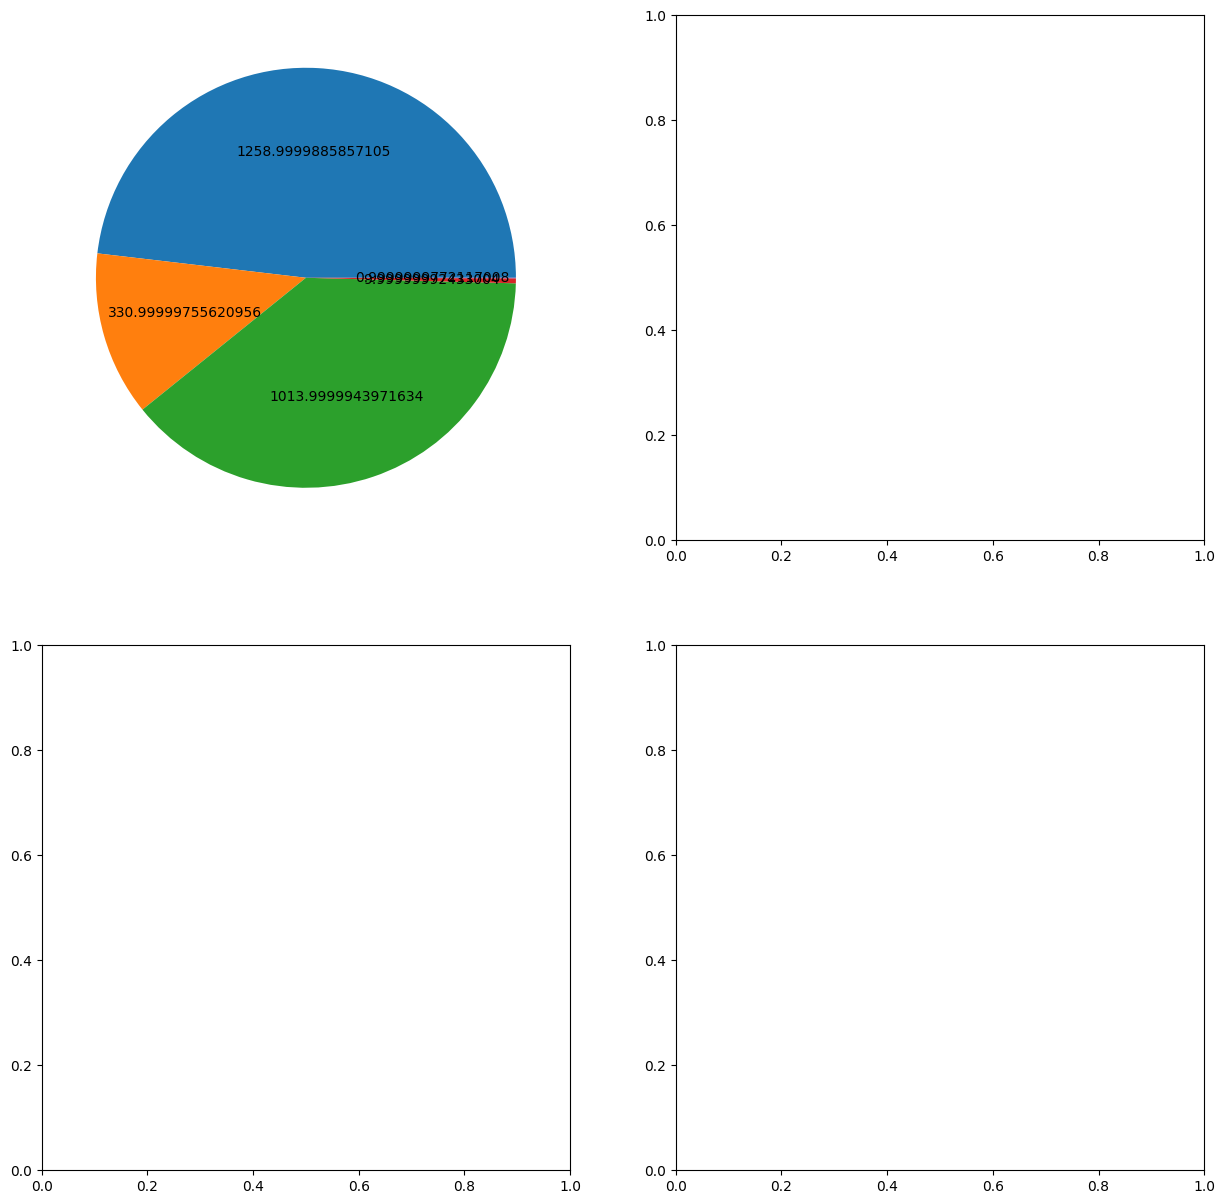

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

axs = axs.flatten()

_ = axs[0].pie(x=list(null_train_clinical_data.values()),
               autopct=lambda x : f'{x*sum(null_train_clinical_data.values())/100}')

In [9]:
titles = ["Peptide Data", "Protein Data", "Clinical Data", "Supplemental Data"]
value_counts = []
duplicates = train_peptides.pivot_table(index=[
    'UniProt', 'Peptide', 'PeptideAbundance',
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))
duplicates = train_proteins.pivot_table(index=[
    'UniProt', 'NPX',
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))
print(value_counts)

[{1: 978298, 2: 1765, 3: 2}, {1: 231941, 2: 400}]


--------------------1--------------------
AUC ROC 0.9512729069542614
--------------------2--------------------
AUC ROC 0.943113412249984
--------------------3--------------------
AUC ROC 0.9366554235503899
--------------------4--------------------
AUC ROC 0.9387413225845348
--------------------5--------------------
AUC ROC 0.9327231150844917
AUC_ROC = 0.9399474810967214


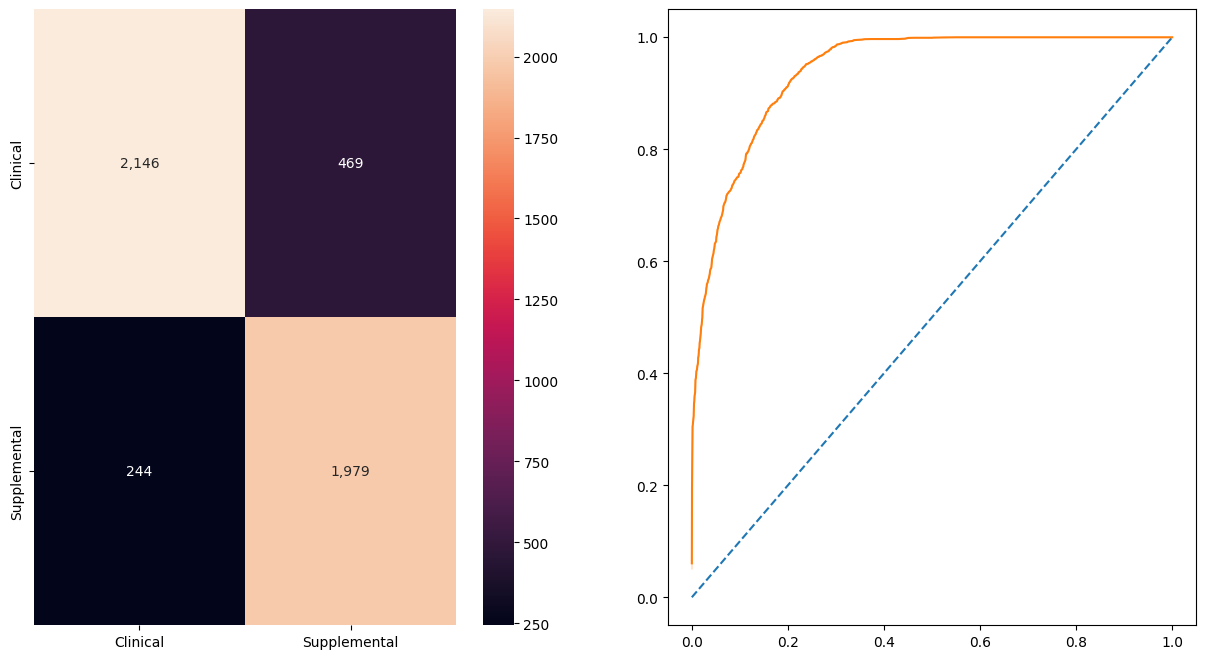

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

train_clinical_data['origin'] = 0
supplemental_clinical_data['origin'] = 1

combined = pd.concat([train_clinical_data, supplemental_clinical_data]).reset_index(drop=True)

features = ['visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication']

le = LabelEncoder()
combined['upd23b_clinical_state_on_medication'] = le.fit_transform(combined['upd23b_clinical_state_on_medication'])

n_fold = 5
skf = StratifiedKFold(n_splits=n_fold, random_state=123, shuffle=True)
train_oof_pred = np.zeros((combined.shape[0],))
train_oof_probas = np.zeros((combined.shape[0],))

for fold, (tr_id, ts_id) in enumerate(skf.split(combined, combined['origin'])):
    print('-' * 20 + f'{fold+1}' + '-' * 20)
    x_tr, x_va = combined.iloc[tr_id], combined.iloc[ts_id]
    y_tr, y_va = combined['origin'].iloc[tr_id], combined['origin'].iloc[ts_id]
    x_tr = x_tr[features]
    x_va = x_va[features]

    model = LGBMClassifier(
        random_state=123
        , learning_rate=0.1
        , objective='binary'
        , metrics='auc'
        , n_jobs=-1
        , n_estimators=2000
        , verbose= -1
        , max_depth= 7
    )
    model.fit(
        x_tr,
        y_tr,
        eval_set=[(x_va, y_va)],
        callbacks=[
        early_stopping(50, verbose=False),
        log_evaluation(2000)
        ]
    )
    oof_pred = model.predict(x_va)
    oof_proba = model.predict_proba(x_va)[:, 1]
    train_oof_pred[ts_id] = oof_pred
    train_oof_probas[ts_id] = oof_proba
    print(f'AUC ROC {roc_auc_score(y_va, oof_proba)}')

auc_vanilla = roc_auc_score(combined['origin'], train_oof_probas)
fpr, tpr, _ = roc_curve(combined['origin'], train_oof_probas)
print(f'AUC_ROC = {auc_vanilla}' )

confusion = confusion_matrix(combined['origin'], train_oof_pred)
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
label = ['Clinical', 'Supplemental']

_ = sns.heatmap(confusion, annot=True, fmt=',d', ax=axs[0], xticklabels=label, yticklabels=label)

_ = sns.lineplot(x=[0,1], y=[0,1], linestyle='--', ax=axs[1])
_ = sns.lineplot(x=fpr, y=tpr, ax=axs[1])

In [11]:
print(train_oof_pred)
len(train_oof_pred)

[0. 0. 1. ... 1. 1. 1.]


4838

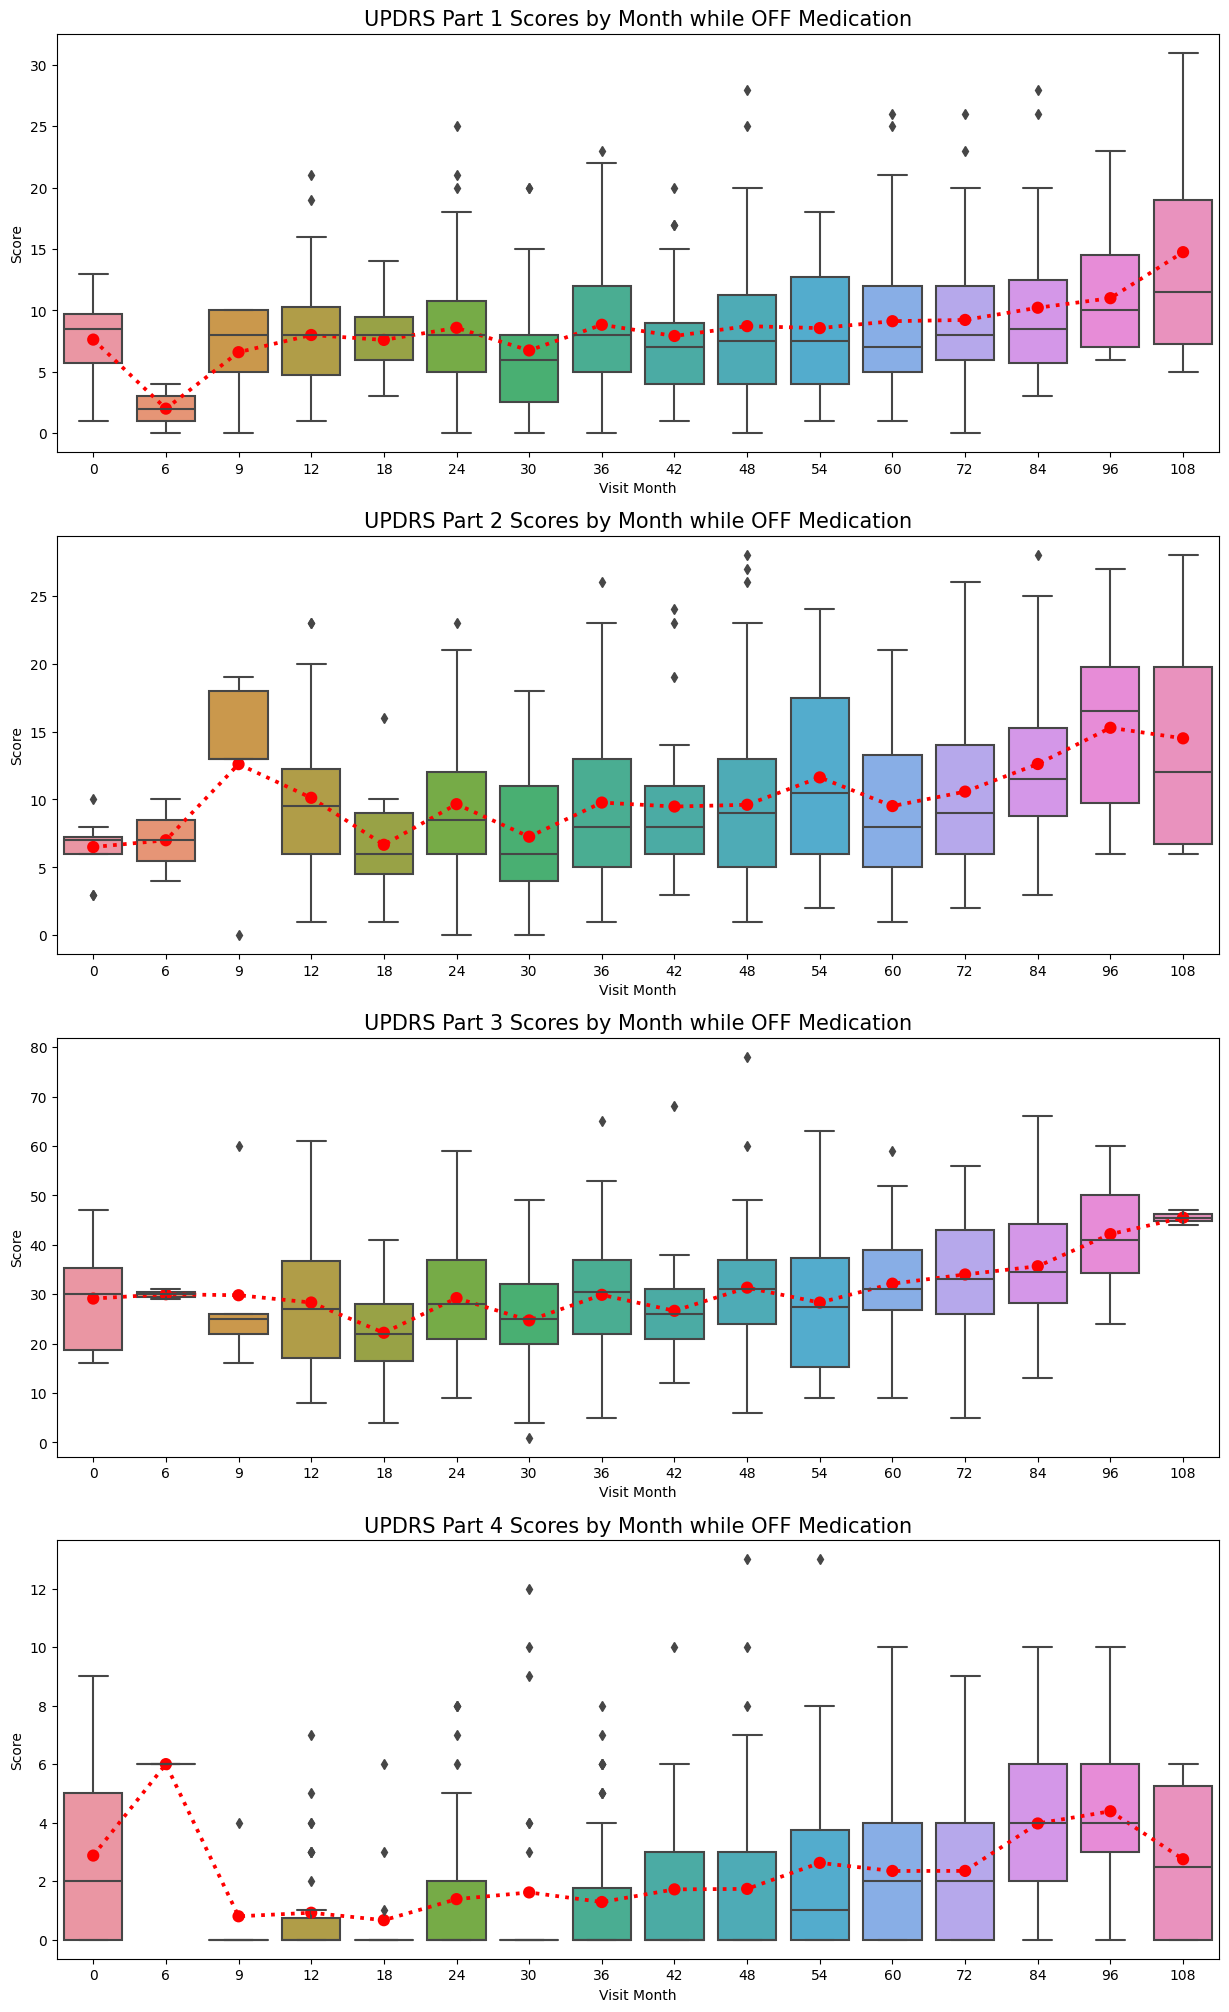

In [12]:
train_clincial_data_copy = train_clinical_data.copy()

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

for x, feature in enumerate(["updrs_1", "updrs_2", "updrs_3", "updrs_4"]):
    ax = axs[x]
    data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "Off")]
    _ = sns.boxplot(data=data, x="visit_month", y=feature, ax=ax)
    _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
    _ = ax.set_title("UPDRS Part {} Scores by Month while OFF Medication".format(x+1), fontsize=15)
    _ = ax.set_xlabel("Visit Month")
    _ = ax.set_ylabel("Score")

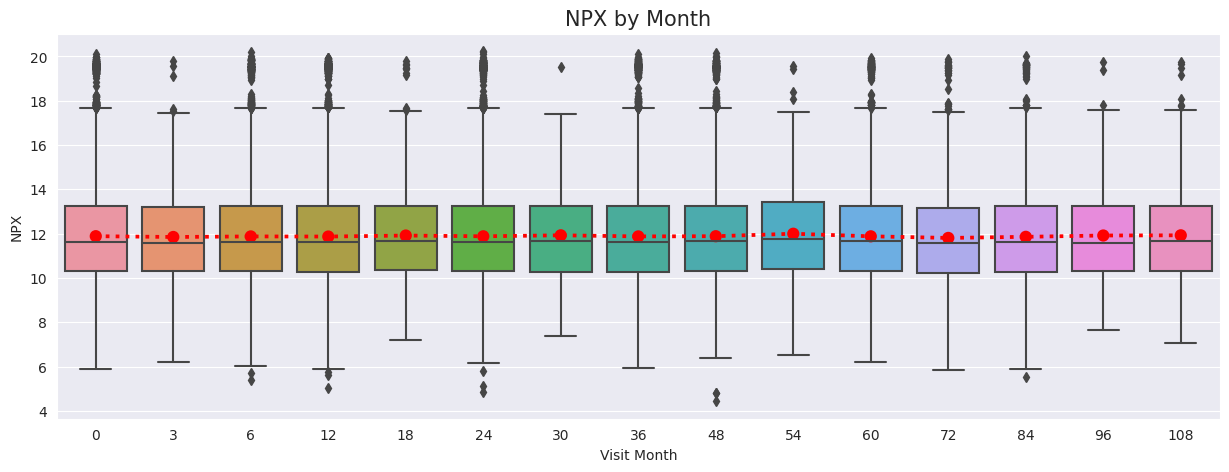

In [13]:
train_proteins_copy = train_proteins.copy()
train_proteins_copy['log_NPX'] = np.log(train_proteins_copy['NPX'])

fig, ax = plt.subplots(1, 1 ,figsize=(15, 5))


sns.set_style('darkgrid')

_ = sns.boxplot(data=train_proteins_copy, x="visit_month", y="log_NPX", ax=ax)
_ = sns.pointplot(data=train_proteins_copy, x="visit_month", y="log_NPX", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("NPX by Month", fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("NPX")


In [14]:
unique_proteins = train_proteins["UniProt"].unique()
unique_months = train_proteins["visit_month"].unique()
protein_dict = dict()
for protein in unique_proteins:
    if protein not in protein_dict:
        protein_dict[protein] = {
            "months": unique_months,
            "count_NPX": [train_proteins[(train_proteins["UniProt"] == protein) & (train_proteins["visit_month"] == month)]["NPX"].count() for month in unique_months],
            "total_NPX": [train_proteins[(train_proteins["UniProt"] == protein) & (train_proteins["visit_month"] == month)]["NPX"].sum() for month in unique_months],
            "avg_NPX": [0 * len(unique_months)],
        }

for protein in unique_proteins:
    protein_dict[protein]["avg_NPX"] = [float(total) / count for total, count in zip(protein_dict[protein]["total_NPX"], protein_dict[protein]["count_NPX"])]
    
for protein in unique_proteins:
    protein_dict[protein]["min_NPX"] = min(protein_dict[protein]["avg_NPX"])
    protein_dict[protein]["max_NPX"] = max(protein_dict[protein]["avg_NPX"])
    
for protein in unique_proteins:
    protein_dict[protein]["mean"] = sum(protein_dict[protein]["avg_NPX"]) / len(protein_dict[protein]["months"])
    protein_dict[protein]["std"] = sum([(total_NPX - protein_dict[protein]["mean"]) ** 2 for total_NPX in protein_dict[protein]["avg_NPX"]]) / (len(unique_months) - 1)
    protein_dict[protein]["std"] = protein_dict[protein]["std"] ** 0.5
    
proteins_with_large_std = [protein for protein in unique_proteins if protein_dict[protein]["std"] > (protein_dict[protein]["mean"] * .25)]

In [15]:
proteins = []
protein_dict = {}
for index, row in train_proteins.iterrows():
    protein = row["UniProt"]
    if protein not in protein_dict:
        protein_dict[protein] = {}
        proteins.append(protein)
    protein_dict[protein][row["visit_id"]] = row["NPX"]
peptides = []
peptide_dict = {}
for index, row in train_peptides.iterrows():
    peptide = row["Peptide"]
    if peptide not in peptide_dict:
        peptide_dict[peptide] = {}
        peptides.append(peptide)
    peptide_dict[peptide][row["visit_id"]] = row["PeptideAbundance"]
    
train_copy = train_clinical_data.copy()
for protein in proteins:
    train_copy[protein] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in protein_dict[protein] else protein_dict[protein][visit_id])
    
for peptide in peptides:
    train_copy[peptide] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in peptide_dict[peptide] else peptide_dict[peptide][visit_id])
print(train_copy)

      visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0         55_0          55            0     10.0      6.0     15.0      NaN   
1         55_3          55            3     10.0      7.0     25.0      NaN   
2         55_6          55            6      8.0     10.0     34.0      NaN   
3         55_9          55            9      8.0      9.0     30.0      0.0   
4        55_12          55           12     10.0     10.0     41.0      0.0   
...        ...         ...          ...      ...      ...      ...      ...   
2610  65043_48       65043           48      7.0      6.0     13.0      0.0   
2611  65043_54       65043           54      4.0      8.0     11.0      1.0   
2612  65043_60       65043           60      6.0      6.0     16.0      1.0   
2613  65043_72       65043           72      3.0      9.0     14.0      1.0   
2614  65043_84       65043           84      7.0      9.0     20.0      3.0   

     upd23b_clinical_state_on_medication  null_coun

In [16]:
train_clinical_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,null_count,origin
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,2,0
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN,2,0
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN,2,0
3,55_9,55,9,8.0,9.0,30.0,0.0,On,0,0
4,55_12,55,12,10.0,10.0,41.0,0.0,On,0,0
...,...,...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off,0,0
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off,0,0
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off,0,0
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off,0,0


In [17]:
titles = ["Peptide Data", "Protein Data", "Clinical Data", "Supplemental Data"]
value_counts = []
duplicates = train_peptides.pivot_table(index=[
    'UniProt', 'Peptide', 'PeptideAbundance',
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))

print(value_counts)

[{1: 978298, 2: 1765, 3: 2}]


In [31]:
null_count_labels = [train_clinical_data[(train_clinical_data["null_count"] == x)].isnull().sum() for x in range(1,5)]

In [33]:
null_count_labels = [train_clinical_data[(train_clinical_data["null_count"] == x)].isnull().sum().index[:-1] for x in range(1, 6)]
null_count_values = [train_clinical_data[(train_clinical_data["null_count"] == x)].isnull().sum().values[:-1] for x in range(1, 6)]

[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]


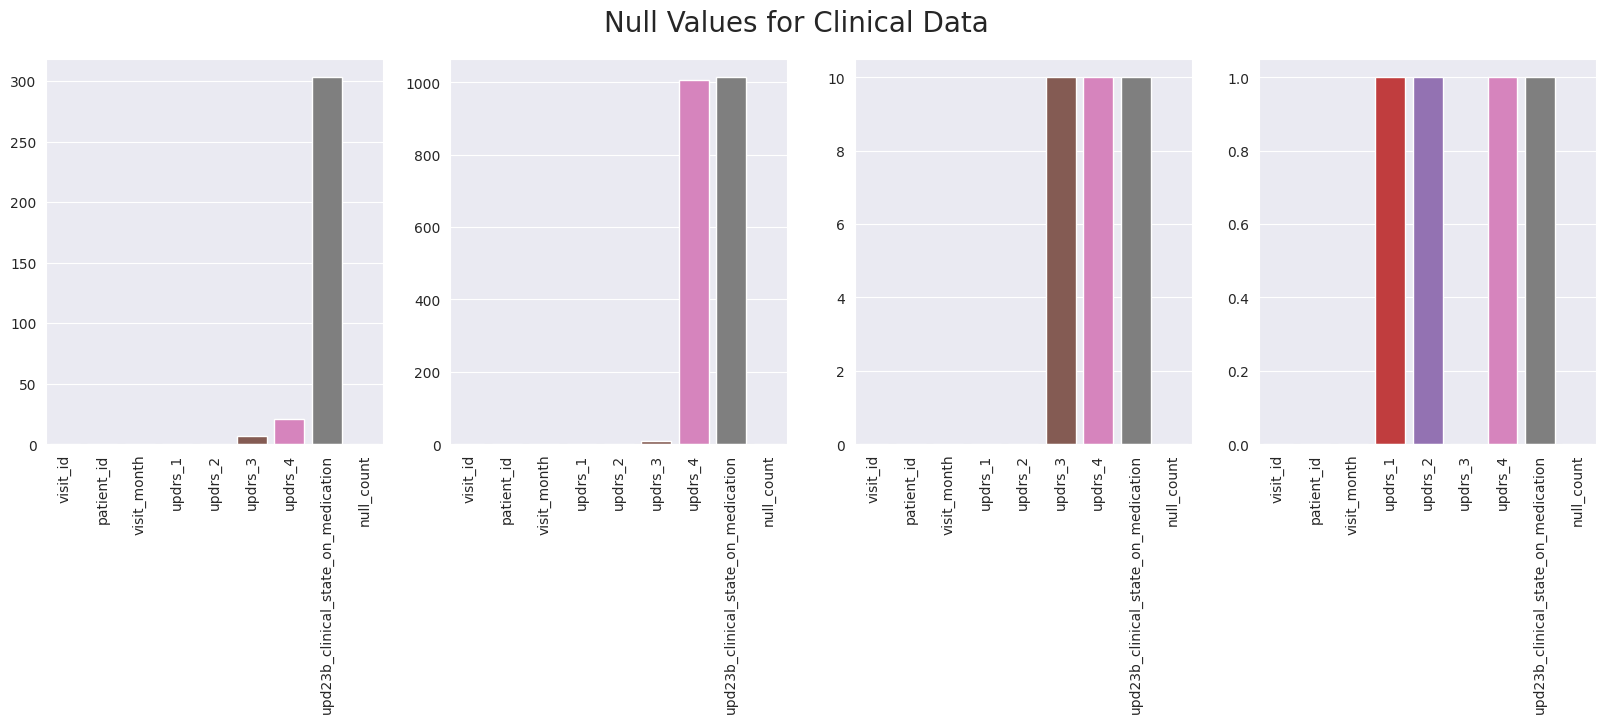

In [45]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle("Null Values for Clinical Data", fontsize=20)
print(axs)
axs = axs.flatten()

for x in range(0, 4):
    ax = axs[x]
    labels = null_count_labels[x]
    _ = sns.barplot(x=labels, y=null_count_values[x], ax=ax)
    _ = ax.set_xticks([z for z in range(len(labels))], labels, rotation=90)

In [49]:
train_dict = dict()

for idx, row in train_clinical_data.iterrows():
    patient_id = row['patient_id']
    visit_month = row['visit_month']
    if patient_id not in train_dict:
        train_dict[patient_id] = {}
    train_dict[patient_id][visit_month] = {
        "updrs_1": row["updrs_1"],
        "updrs_2": row["updrs_2"],
        "updrs_3": row["updrs_3"],
        "updrs_4": row["updrs_4"],
    }

train = train_clinical_data.copy()
train['month_offset'] = 0

for idx, row in train_clinical_data.iterrows():
    visit_id = row['visit_id']
    patient_id = row["patient_id"]
    visit_month = row["visit_month"]
    month_offsets = [6, 12, 24]
    for month_offset in month_offsets:
        new_visit_month = visit_month + month_offset
        if new_visit_month in train_dict[patient_id]:
            new_row = {
                "visit_id": visit_id,
                "visit_month": visit_month,
                "month_offset": month_offset,
                "patient_id": patient_id,
                "updrs_1": train_dict[patient_id][new_visit_month]["updrs_1"],
                "updrs_2": train_dict[patient_id][new_visit_month]["updrs_2"],
                "updrs_3": train_dict[patient_id][new_visit_month]["updrs_3"],
                "updrs_4": train_dict[patient_id][new_visit_month]["updrs_4"],
                "upd23b_clinical_state_on_medication": row["upd23b_clinical_state_on_medication"],
            }
            train = train.append(new_row, ignore_index=True)
print(train)

      visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0         55_0          55            0     10.0      6.0     15.0      NaN   
1         55_3          55            3     10.0      7.0     25.0      NaN   
2         55_6          55            6      8.0     10.0     34.0      NaN   
3         55_9          55            9      8.0      9.0     30.0      0.0   
4        55_12          55           12     10.0     10.0     41.0      0.0   
...        ...         ...          ...      ...      ...      ...      ...   
7646  65043_48       65043           48      3.0      9.0     14.0      1.0   
7647  65043_54       65043           54      6.0      6.0     16.0      1.0   
7648  65043_60       65043           60      3.0      9.0     14.0      1.0   
7649  65043_60       65043           60      7.0      9.0     20.0      3.0   
7650  65043_72       65043           72      7.0      9.0     20.0      3.0   

     upd23b_clinical_state_on_medication  null_coun

------------------------------1------------------------------


CatBoostError: Length of label=1531 and length of data=6120 is different.

-------> Fold 1 <--------
: SMAPE = 96.11611611122025
-------> Fold 2 <--------
: SMAPE = 96.34695243844213
-------> Fold 3 <--------
: SMAPE = 94.33612317014418
-------> Fold 4 <--------
: SMAPE = 96.33976908339322
-------> Fold 5 <--------
: SMAPE = 95.67132206485908
--> Overall results for out of fold predictions
: SMAPE = 95.76205657361177


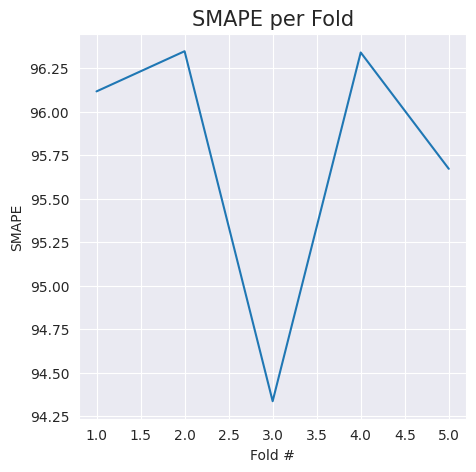

In [59]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold

def smape(y_true, y_pred):
    denominator = (y_true + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff)

features = [
    'visit_month', 'month_offset',
]

train_copy = train.copy()
train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]] = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].fillna(0)

n_folds = 5
skf = KFold(n_splits=n_folds, random_state=2023, shuffle=True)
train_oof_preds = np.zeros((train.shape[0], 4))
smape_scores = []

for fold, (train_index, test_index) in enumerate(skf.split(train_copy, train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]])):
    print("-------> Fold {} <--------".format(fold + 1))
    x_train, x_valid = pd.DataFrame(train_copy.iloc[train_index]), pd.DataFrame(train_copy.iloc[test_index])
    y_train, y_valid = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[train_index], train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[test_index]
    
    x_train_features = pd.DataFrame(x_train[features])
    x_valid_features = pd.DataFrame(x_valid[features])

    model = CatBoostRegressor(
        eval_metric="MultiRMSE",
        loss_function="MultiRMSE",
        random_state=2023,
        num_boost_round=5000,
        od_type="Iter",
        od_wait=200,
        use_best_model=True,
        verbose=0,    
    )
    model.fit(
        x_train_features[features], 
        y_train,
        eval_set=[(x_valid_features[features], y_valid)],
        verbose=0,
        early_stopping_rounds=200,
        use_best_model=True,
    )
    oof_preds = model.predict(x_valid_features[features])
    train_oof_preds[test_index] = np.rint(oof_preds)

    reshaped_truth = y_valid.to_numpy().reshape(-1, 1)
    new_preds = np.rint(oof_preds)
    reshaped_preds = new_preds.reshape(-1, 1)

    local_smape = smape(reshaped_truth.flatten(), reshaped_preds.flatten())
    smape_scores.append(local_smape)
    print(": SMAPE = {}".format(local_smape))
    
# すべての分割でのSMAPEスコアの平均値を計算し、smape_baselineに格納します。
smape_baseline = np.mean(smape_scores)
print("--> Overall results for out of fold predictions")
print(": SMAPE = {}".format(smape_baseline))

# 最後に、各分割のSMAPEスコアを折れ線グラフで表示します。x軸に分割番号、y軸にSMAPEが表示されます。
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

data = pd.DataFrame({"Fold": [x + 1 for x in range(n_folds)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")